In [1]:
import pandas as pd
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})

In [2]:
path = r'C:\users\meric\Desktop\The Data\Sign'
os.listdir(path)

['sign_mnist_test', 'sign_mnist_train']

In [3]:
os.path.join(path, 'sign_mnist_train.csv')

'C:\\users\\meric\\Desktop\\The Data\\Sign\\sign_mnist_train.csv'

In [4]:
train=pd.read_csv(os.path.join(path, 'sign_mnist_train','sign_mnist_train.csv'))
test = pd.read_csv(os.path.join(path, 'sign_mnist_test','sign_mnist_test.csv'))

In [5]:
# find the missing letters
import string
for z in zip(list(range(0,26)),list(string.ascii_lowercase) ):
    if(z[0] in (set(range(0,26))-set((train.iloc[:,0]).unique()) )):
        print(z)

(9, 'j')
(25, 'z')


<AxesSubplot:xlabel='label', ylabel='Count'>

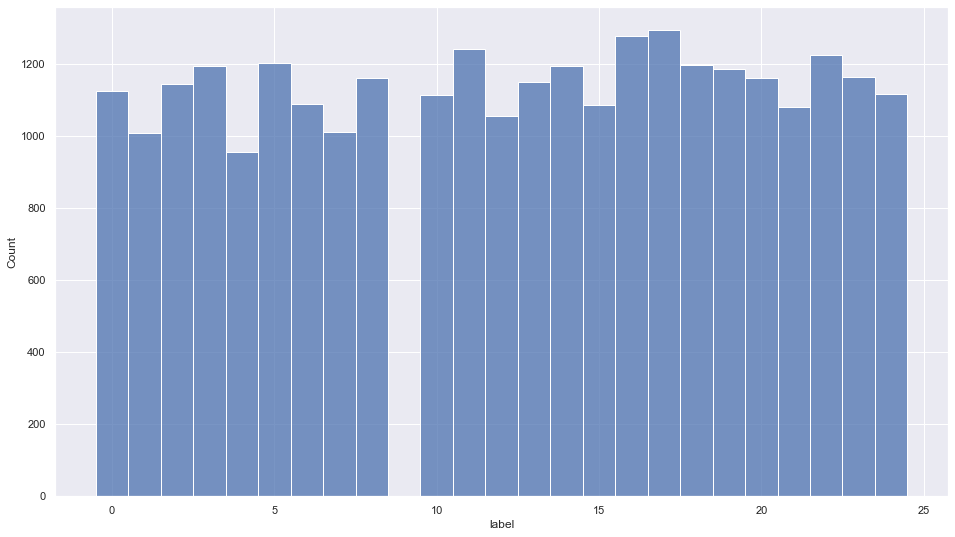

In [6]:
#Look at distribution of train set
sns.histplot(data = train.iloc[:,0], discrete=True)

<AxesSubplot:xlabel='label', ylabel='Count'>

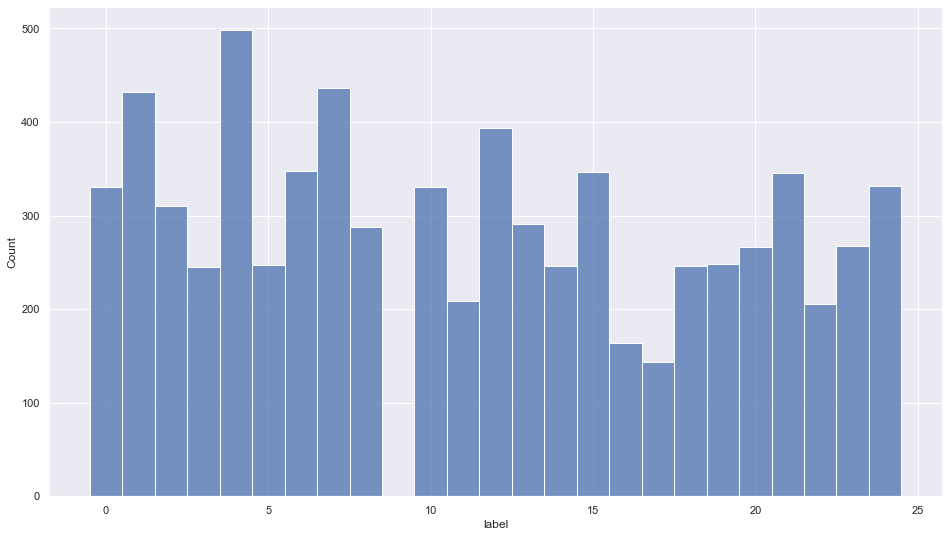

In [7]:
#Look at distribution of test set
sns.histplot(data =test.iloc[:,0], discrete = True)

In [72]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [74]:
binarizer = LabelBinarizer()
encoder = LabelEncoder()

In [79]:
lab_train=train['label']
lab_test =test['label']

In [80]:
lab_train = encoder.fit_transform(lab_train)
lab_test = encoder.fit_transform(lab_test)

In [12]:
lab_train = binarizer.fit_transform(lab_train)
lab_test = binarizer.fit_transform(lab_test)

In [58]:
train['label'].nunique()

24

In [19]:
trainnp=train.iloc[:,1:].to_numpy(dtype = float)
testnp = test.iloc[:,1:].to_numpy(dtype = float)

In [26]:
trainnp=trainnp.reshape((27455,28,28))

In [27]:
testnp=testnp.reshape((7172,28,28))

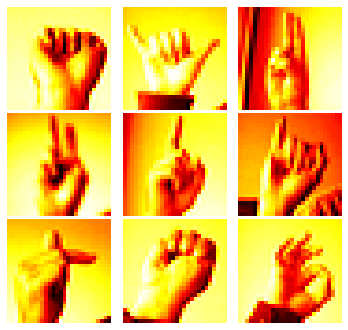

In [103]:
import random

f, ax = plt.subplots(3,3) 
f.set_size_inches(5, 5)

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(trainnp[random.randint(0, trainnp.shape[0])]  , cmap ='hot' )
        ax[i,j].axis('off')
    plt.tight_layout(h_pad=1,w_pad=1)

In [66]:
#Expand the dimensions of the train and test set to fit the networks expected type.
trainnp=np.expand_dims(trainnp,axis=3)
testnp=np.expand_dims(testnp,axis=3)

[[[[107.]
   [118.]
   [127.]
   ...
   [170.]
   [170.]
   [169.]]

  [[111.]
   [121.]
   [129.]
   ...
   [171.]
   [171.]
   [170.]]

  [[113.]
   [123.]
   [131.]
   ...
   [171.]
   [171.]
   [171.]]

  ...

  [[142.]
   [150.]
   [159.]
   ...
   [202.]
   [201.]
   [200.]]

  [[142.]
   [151.]
   [160.]
   ...
   [204.]
   [203.]
   [202.]]

  [[142.]
   [151.]
   [160.]
   ...
   [204.]
   [203.]
   [202.]]]


 [[[155.]
   [157.]
   [156.]
   ...
   [138.]
   [ 92.]
   [108.]]

  [[158.]
   [159.]
   [159.]
   ...
   [142.]
   [116.]
   [143.]]

  [[161.]
   [161.]
   [161.]
   ...
   [147.]
   [125.]
   [140.]]

  ...

  [[162.]
   [159.]
   [145.]
   ...
   [ 91.]
   [101.]
   [ 94.]]

  [[153.]
   [139.]
   [115.]
   ...
   [ 97.]
   [ 95.]
   [120.]]

  [[135.]
   [116.]
   [ 95.]
   ...
   [103.]
   [135.]
   [149.]]]


 [[[187.]
   [188.]
   [188.]
   ...
   [ 66.]
   [ 77.]
   [ 83.]]

  [[188.]
   [189.]
   [189.]
   ...
   [ 73.]
   [ 73.]
   [ 71.]]

  [[190.]
   [19

In [92]:
print(trainnp.shape)
print(testnp.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [49]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [84]:
#Declare generators so we can augment data and artificially increase our train set 
train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    fill_mode='nearest')
test_generator = ImageDataGenerator(rescale=1./255)


In [85]:
#Define the CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [89]:
train_gen = train_generator.flow(trainnp,
                                lab_train,
                                batch_size=64)
test_gen = test_generator.flow(testnp,
                              lab_test,
                              batch_size=64)

In [90]:
history = model.fit(train_gen,
                    epochs=20,
                              validation_data = test_gen
                          
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 429 steps, validate for 113 steps
Epoch 1/20
429/429 [==============================] - 9s 22ms/step - loss: 2.5058 - accuracy: 0.2323 - val_loss: 1.5869 - val_accuracy: 0.4802
Epoch 2/20
429/429 [==============================] - 10s 24ms/step - loss: 1.5218 - accuracy: 0.5076 - val_loss: 0.9424 - val_accuracy: 0.6525
Epoch 3/20
429/429 [==============================] - 10s 23ms/step - loss: 1.0421 - accuracy: 0.6489 - val_loss: 0.6930 - val_accuracy: 0.7483
Epoch 4/20
429/429 [==============================] - 10s 24ms/step - loss: 0.7940 - accuracy: 0.7267 - val_loss: 0.3545 - val_accuracy: 0.8802
Epoch 5/20
429/429 [==============================] - 10s 23ms/step - loss: 0.6357 - accuracy: 0.7821 - val_loss: 0.2727 - val_accuracy: 0.9066
Epoch 6/20
429/429 [==============================] - 10s 23ms/step - loss: 0.5456 - accuracy: 0.8131 - val_loss: 0.1907 - val_accuracy: 0.9345
Epoch 7/20
429/429 [=======================

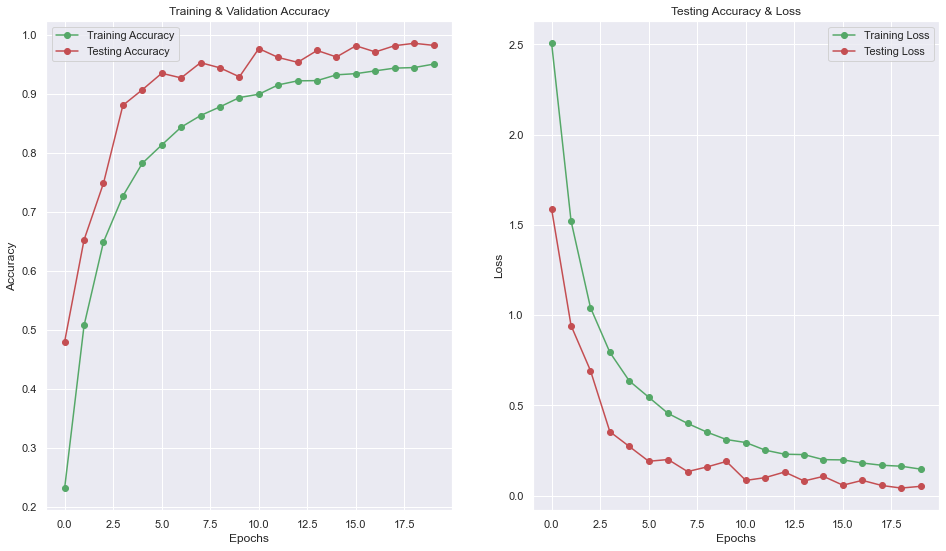

In [93]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [144]:
n_testnp = testnp/255
n_testnp

array([[[[0.58431373],
         [0.58431373],
         [0.58823529],
         ...,
         [0.58823529],
         [0.58823529],
         [0.58431373]],

        [[0.58823529],
         [0.58823529],
         [0.58823529],
         ...,
         [0.59215686],
         [0.58823529],
         [0.59215686]],

        [[0.58823529],
         [0.59215686],
         [0.59215686],
         ...,
         [0.59215686],
         [0.59215686],
         [0.59607843]],

        ...,

        [[0.27058824],
         [0.27058824],
         [0.30196078],
         ...,
         [0.45490196],
         [0.44313725],
         [0.4627451 ]],

        [[0.29019608],
         [0.29411765],
         [0.29803922],
         ...,
         [0.43137255],
         [0.45490196],
         [0.44313725]],

        [[0.29411765],
         [0.29019608],
         [0.29019608],
         ...,
         [0.43921569],
         [0.47058824],
         [0.41960784]]],


       [[[0.49411765],
         [0.50196078],
         [0.51

In [145]:
predictions = model.predict_classes(n_testnp)

In [138]:
history.history['accuracy'][-1]
history.history['val_accuracy'][-1]

0.9817345

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<AxesSubplot:>

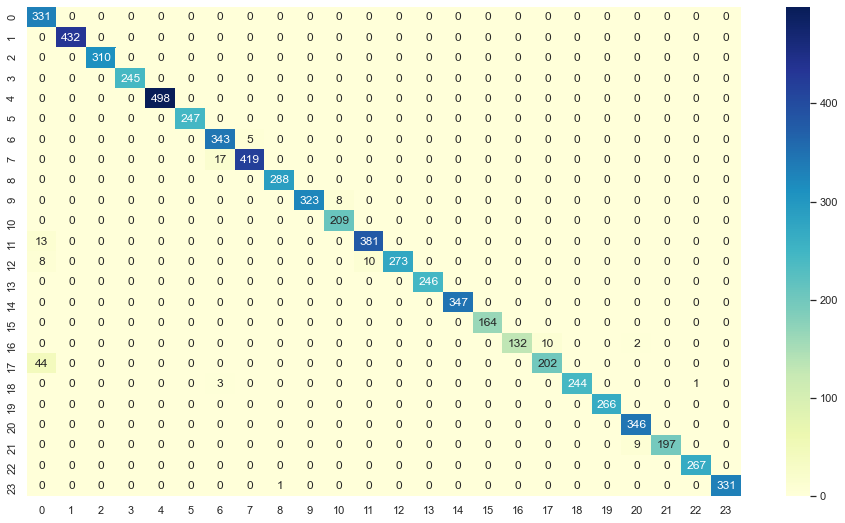

In [146]:
cm =confusion_matrix(lab_test, predictions)
sns.heatmap(cm,cmap='YlGnBu',annot=True, fmt="d")

In [147]:
from sklearn.metrics import classification_report


In [130]:
len(lab_test)

7172

In [172]:
cr=classification_report(lab_test,predictions,output_dict=True)
df=pd.DataFrame(cr).T
df

,precision,recall,f1-score,support
0,0.835859,1.000000,0.910591,331.000000
1,1.000000,1.000000,1.000000,432.000000
2,1.000000,1.000000,1.000000,310.000000
3,1.000000,1.000000,1.000000,245.000000
4,1.000000,1.000000,1.000000,498.000000
5,1.000000,1.000000,1.000000,247.000000
6,0.944904,0.985632,0.964838,348.000000
7,0.988208,0.961009,0.974419,436.000000
8,0.996540,1.000000,0.998267,288.000000
9,1.000000,0.975831,0.987768,331.000000


In [160]:
df.iloc[:24,:]['precision'].min()
df.iloc[:24,:]['recall'].min()
df.iloc[:24,:]['f1-score'].min()

0.8820960698689957

In [173]:
df=df.reset_index()
#
#df

In [175]:
df.columns = ['Class','precision','recall','f1-score','support']

In [176]:
df

,Class,precision,recall,f1-score,support
0,0,0.835859,1.000000,0.910591,331.000000
1,1,1.000000,1.000000,1.000000,432.000000
2,2,1.000000,1.000000,1.000000,310.000000
3,3,1.000000,1.000000,1.000000,245.000000
4,4,1.000000,1.000000,1.000000,498.000000
5,5,1.000000,1.000000,1.000000,247.000000
6,6,0.944904,0.985632,0.964838,348.000000
7,7,0.988208,0.961009,0.974419,436.000000
8,8,0.996540,1.000000,0.998267,288.000000
9,9,1.000000,0.975831,0.987768,331.000000


In [181]:
df.iloc[:24,:][['Class','precision']]
df.iloc[:24,:]['precision'].min()

0.8358585858585859